In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plot_lib.plot_rainfall import integrate_datetime, RainGauge

In [2]:
rain = RainGauge()

In [3]:
dft = pd.read_excel('../assets/results/map_thaiwater.xlsx')
date = pd.to_datetime(dft['date'])
date = date.dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
dft['date'] = date
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype                       
---  ------           --------------  -----                       
 0   Unnamed: 0       7905 non-null   int64                       
 1   station          7905 non-null   object                      
 2   close_range      7905 non-null   float64                     
 3   nearest_station  7905 non-null   object                      
 4   date             7905 non-null   datetime64[ns, Asia/Bangkok]
 5   sum              7905 non-null   float64                     
 6   lat              7905 non-null   float64                     
 7   long             7905 non-null   float64                     
 8   validate_by      7905 non-null   object                      
dtypes: datetime64[ns, Asia/Bangkok](1), float64(4), int64(1), object(3)
memory usage: 555.9+ KB


In [4]:
dft = dft.drop(['Unnamed: 0'], axis=1)
dft

,station,close_range,nearest_station,date,sum,lat,long,validate_by
0,ปราจีนบุรี,0.834411,Prachin Buri,2022-05-27 07:00:00+07:00,3.1,14.058418,101.369305,gsmap
1,เมืองปราจีนบุรี,1.917662,Prachin Buri,2022-05-27 07:00:00+07:00,3.0,14.053527,101.386873,gsmap
2,สตึก,9.511877,Buri Ram,2022-05-27 07:00:00+07:00,3.0,15.299859,103.292314,gsmap
3,ทต.สันนาเม็ง,9.977066,Chiang Mai,2022-05-27 07:00:00+07:00,2.6,18.838075,99.056945,gsmap
4,บ้านท่าคลอง,7.431292,Krabi,2022-05-27 07:00:00+07:00,0.5,8.110498,98.908153,gsmap
...,...,...,...,...,...,...,...,...
7900,คลองจระเข้ใหญ่ บางเสาธง (วัดศรีวารีน้อย),4.038344,Suvarnabhumi Airport,2022-07-11 07:00:00+07:00,1.2,13.669475,100.800564,gsmap
7901,โกสุมพิสัย,0.762201,Kosum Phisai (2),2022-07-11 07:00:00+07:00,1.2,16.250986,103.074020,gsmap
7902,สะเดา,5.726687,Sa Dao (2),2022-07-11 07:00:00+07:00,1.2,6.796686,100.442387,gsmap
7903,ตากฟ้า สกษ.,0.000144,Takfa (1),2022-07-11 07:00:00+07:00,1.2,15.349443,100.530277,gsmap


In [5]:
dfg = rain.df_interpolate_nan('gsmap2022.xlsx')
dfg = rain.add_column_split_datetime(dfg)
dfg = dfg.drop(['Unnamed: 0.1'], axis=1)
dfg

,ID,WMO_CODE,NAME_EN,Region,Latitude,Longitude,00Z,01Z,02Z,03Z,...,20Z,21Z,22Z,23Z,sum,year,month,day,date,english_day
0,1,300,Mae Hong Son,Northern,19.298972,97.975778,0,0,0,0,...,0.22759518027305603,0.15417519211769104,0.14867419004440308,0.1414373219013214,1.4134926795959473,2022,7,2,2022-07-02 07:00:00+07:00,Sat
1,2,325,Mae Sariang,Northern,18.166667,97.933333,0,0,0,0,...,0.08311599493026733,0.07849250733852386,0.0923473909497261,0.06365538388490677,0.8864744901657104,2022,7,2,2022-07-02 07:00:00+07:00,Sat
2,3,303,Chiang Rai,Northern,19.961389,99.881389,0,0.5173004269599915,0.2576569616794586,0.18269197642803192,...,0,0,0,0,3.2337076663970947,2022,7,2,2022-07-02 07:00:00+07:00,Sat
3,4,304,Chiang Rai (1),Northern,19.870833,99.782778,0,0.31870177388191223,0.2236250340938568,0,...,0,0,0,0,2.828620433807373,2022,7,2,2022-07-02 07:00:00+07:00,Sat
4,5,310,Phayao,Northern,19.133333,99.900000,0,0,0,0,...,0,0,0,0,2.6045122146606445,2022,7,2,2022-07-02 07:00:00+07:00,Sat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36895,119,565,Phuket Airport,Southern WestCoast,8.145000,98.314444,0,0,0,0,...,0,0,0,0,4.013916492462158,2022,9,22,2022-09-22 07:00:00+07:00,Thu
36896,120,563,Krabi,Southern WestCoast,8.103611,98.975278,0,0,0,0,...,0,0,0,0,0,2022,9,22,2022-09-22 07:00:00+07:00,Thu
36897,121,566,Ko Lanta,Southern WestCoast,7.533334,99.050000,0,0,0,0,...,0,0,0,0,0,2022,9,22,2022-09-22 07:00:00+07:00,Thu
36898,122,567,Trang,Southern WestCoast,7.516667,99.616667,0,0,0,0,...,0,0,0,0,0,2022,9,22,2022-09-22 07:00:00+07:00,Thu


In [6]:
dfp = rain.df_interpolate_nan('persiann2022.xlsx')
dfp = rain.add_column_split_datetime(dfp)
dfp = dfp.drop(['Unnamed: 0.1'], axis=1)
dfp

,ID,WMO_CODE,NAME_EN,Region,Latitude,Longitude,00Z,01Z,02Z,03Z,...,20Z,21Z,22Z,23Z,sum,year,month,day,date,english_day
0,1,300,Mae Hong Son,Northern,19.298972,97.975778,0,0,0,0,...,0,0,0,0,0,2022,3,9,2022-03-09 07:00:00+07:00,Wed
1,2,325,Mae Sariang,Northern,18.166667,97.933333,0,0,0,0,...,0,0,0,0,0,2022,3,9,2022-03-09 07:00:00+07:00,Wed
2,3,303,Chiang Rai,Northern,19.961389,99.881389,0,0,0,0,...,0,0,0,0,0,2022,3,9,2022-03-09 07:00:00+07:00,Wed
3,4,304,Chiang Rai (1),Northern,19.870833,99.782778,0,0,0,0,...,0,0,0,0,0,2022,3,9,2022-03-09 07:00:00+07:00,Wed
4,5,310,Phayao,Northern,19.133333,99.900000,0,0,0,0,...,0,0,0,0,0,2022,3,9,2022-03-09 07:00:00+07:00,Wed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36895,119,565,Phuket Airport,Southern WestCoast,8.145000,98.314444,0,0,0,0,...,0,0,0,0,20.719999313354492,2022,4,19,2022-04-19 07:00:00+07:00,Tue
36896,120,563,Krabi,Southern WestCoast,8.103611,98.975278,0,0,0,0,...,0,0,0,0,5.340000152587891,2022,4,19,2022-04-19 07:00:00+07:00,Tue
36897,121,566,Ko Lanta,Southern WestCoast,7.533334,99.050000,0,0,0,0,...,0,0,0,0,31.530000686645508,2022,4,19,2022-04-19 07:00:00+07:00,Tue
36898,122,567,Trang,Southern WestCoast,7.516667,99.616667,0,0,0,0,...,0,0,0,0,11.319999694824219,2022,4,19,2022-04-19 07:00:00+07:00,Tue


In [7]:
dfg_period = rain.filter_dates(dfg, start_date='2022-05-27', end_date='2022-07-12')
dfg_period = dfg_period.sort_values('date')
dfg_period

,ID,WMO_CODE,NAME_EN,Region,Latitude,Longitude,00Z,01Z,02Z,03Z,...,20Z,21Z,22Z,23Z,sum,year,month,day,date,english_day
29554,35,357,Nakhon Phanom,Northeastern,17.410833,104.782500,0,0,0,0,...,0.07619025558233261,0.0791679173707962,0.0726575031876564,1.0165468454360962,18.300827026367188,2022,5,27,2022-05-27 07:00:00+07:00,Fri
29552,33,350,Loei (1),Northeastern,17.400000,101.733333,0,0,0,0,...,0,0,0,0,0,2022,5,27,2022-05-27 07:00:00+07:00,Fri
29553,34,354,Udon Thani,Northeastern,17.383333,102.800000,0,0,0,0,...,0,0,0,0,0,2022,5,27,2022-05-27 07:00:00+07:00,Fri
29555,36,358,Nakhon Phanom (1),Northeastern,17.443056,104.773611,0,0,0,0,...,0.07619025558233261,0.0791679173707962,0.0726575031876564,1.0165468454360962,18.300827026367188,2022,5,27,2022-05-27 07:00:00+07:00,Fri
29556,37,356,Sakon Nakhon,Northeastern,17.150003,104.133336,0,0,0,0,...,0.14420254528522491,0,0,0,0.45738327503204346,2022,5,27,2022-05-27 07:00:00+07:00,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6431,36,358,Nakhon Phanom (1),Northeastern,17.443056,104.773611,0,0,0.24347251653671265,3.622635841369629,...,0,4.573764801025391,0,0,20.828683853149414,2022,7,11,2022-07-11 07:00:00+07:00,Mon
6430,35,357,Nakhon Phanom,Northeastern,17.410833,104.782500,0,0,0.24347251653671265,3.622635841369629,...,0,4.573764801025391,0,0,20.828683853149414,2022,7,11,2022-07-11 07:00:00+07:00,Mon
6429,34,354,Udon Thani,Northeastern,17.383333,102.800000,0,0,0,0,...,0,0,0,0.8840051889419556,4.35792350769043,2022,7,11,2022-07-11 07:00:00+07:00,Mon
6442,47,403,Chaiyaphum,Northeastern,15.800000,102.033334,0,0,0,0,...,0.44046375155448914,0,0,0,4.6656270027160645,2022,7,11,2022-07-11 07:00:00+07:00,Mon


In [8]:
dfp_period = rain.filter_dates(dfp, start_date='2022-05-27', end_date='2022-07-12')
dfp_period = dfp_period.sort_values('date')
dfp_period

,ID,WMO_CODE,NAME_EN,Region,Latitude,Longitude,00Z,01Z,02Z,03Z,...,20Z,21Z,22Z,23Z,sum,year,month,day,date,english_day
17216,120,563,Krabi,Southern WestCoast,8.103611,98.975278,0,0,0,0,...,0,0,0,1.7799999713897705,12.979999542236328,2022,5,27,2022-05-27 07:00:00+07:00,Fri
17186,90,478,Rayong,Eastern,12.617028,101.340750,0,0,0,0,...,0,0,0,0,9.809999465942383,2022,5,27,2022-05-27 07:00:00+07:00,Fri
17184,88,461,Pattaya,Eastern,12.920000,100.869444,0,0,0,0,...,0,0,0,0,5.869999885559082,2022,5,27,2022-05-27 07:00:00+07:00,Fri
17183,87,460,Ko Sichang,Eastern,13.161667,100.801944,0,0,0,0,...,0,0,0,0,19.029998779296875,2022,5,27,2022-05-27 07:00:00+07:00,Fri
17182,86,463,Laem Chabang,Eastern,13.076944,100.875833,0,0,0,0,...,0,0,0,0,11.929999351501465,2022,5,27,2022-05-27 07:00:00+07:00,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21927,34,354,Udon Thani,Northeastern,17.383333,102.800000,5.710000038146973,0,0,0,...,0,0,1.7100000381469727,7.179999828338623,15.6899995803833,2022,7,11,2022-07-11 07:00:00+07:00,Mon
21926,33,350,Loei (1),Northeastern,17.400000,101.733333,0,0,0,0,...,0,0,0,0,10.440000534057617,2022,7,11,2022-07-11 07:00:00+07:00,Mon
21925,32,353,Loei,Northeastern,17.450000,101.733333,0,0,0,0,...,0,0,0,0,11.149999618530273,2022,7,11,2022-07-11 07:00:00+07:00,Mon
21938,45,405,Roi Et,Northeastern,16.050000,103.683334,0,0,0,0,...,0,0,1.9500000476837158,3.559999942779541,27.940000534057617,2022,7,11,2022-07-11 07:00:00+07:00,Mon


In [9]:
display(dft.date.min())
display(dft.date.max())

Timestamp('2022-05-27 07:00:00+0700', tz='Asia/Bangkok')

Timestamp('2022-07-11 07:00:00+0700', tz='Asia/Bangkok')

In [10]:
all_station = set(dfg_period.NAME_EN)
thaiwater_station = set(dft.nearest_station)
count_station = len(all_station) - len(thaiwater_station)
print(f'all station: {len(all_station)}, thaiwater stations: {len(thaiwater_station)} is not retrieve: {count_station}')


all station: 123, thaiwater stations: 119 is not retrieve: 4


In [11]:
list(all_station - thaiwater_station)

['Roi Et (1)', 'Nakhon Phanom (1)', 'Sakon Nakhon (1)', 'Bang Na (1)']

In [12]:
dfp_period = dfp_period.astype({'sum': 'float64'})
dfg_period = dfg_period.astype({'sum': 'float64'})

In [13]:
display(dft.groupby(dft.date.dt.month)['sum'].mean())
display(dfg_period.groupby(dfg_period.date.dt.month)['sum'].mean())
display(dfp_period.groupby(dfp_period.date.dt.month)['sum'].mean())
#

date
5     7.574588
6     7.562959
7    12.048129
Name: sum, dtype: float64

date
5    4.870431
6    3.997961
7    8.314891
Name: sum, dtype: float64

date
5    5.456748
6    5.942791
7    2.689098
Name: sum, dtype: float64

In [14]:
thaiwater_station = list(set(dft.nearest_station))

In [15]:
for i in range(3):
    df_month = dft.loc[dft['date'].dt.month == i + 5]
    all_station = set(dfg_period.NAME_EN)
    thaiwater_station = set(df_month.nearest_station)
    count_station = len(all_station) - len(thaiwater_station)
    print(f'all station: {len(all_station)}, thaiwater stations: {len(thaiwater_station)} is not station: {count_station} month: {i + 5}')

all station: 123, thaiwater stations: 118 is not station: 5 month: 5
all station: 123, thaiwater stations: 119 is not station: 4 month: 6
all station: 123, thaiwater stations: 118 is not station: 5 month: 7


/var/folders/3n/4z6m79x53dl0400tlmqgv0bm0000gn/T/ipykernel_12303/4100080092.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="sum", y="nearest_station",
/var/folders/3n/4z6m79x53dl0400tlmqgv0bm0000gn/T/ipykernel_12303/4100080092.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="sum", y="NAME_EN",
/var/folders/3n/4z6m79x53dl0400tlmqgv0bm0000gn/T/ipykernel_12303/4100080092.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="sum", y="NAME_EN",


<AxesSubplot: xlabel='sum', ylabel='nearest_station'>

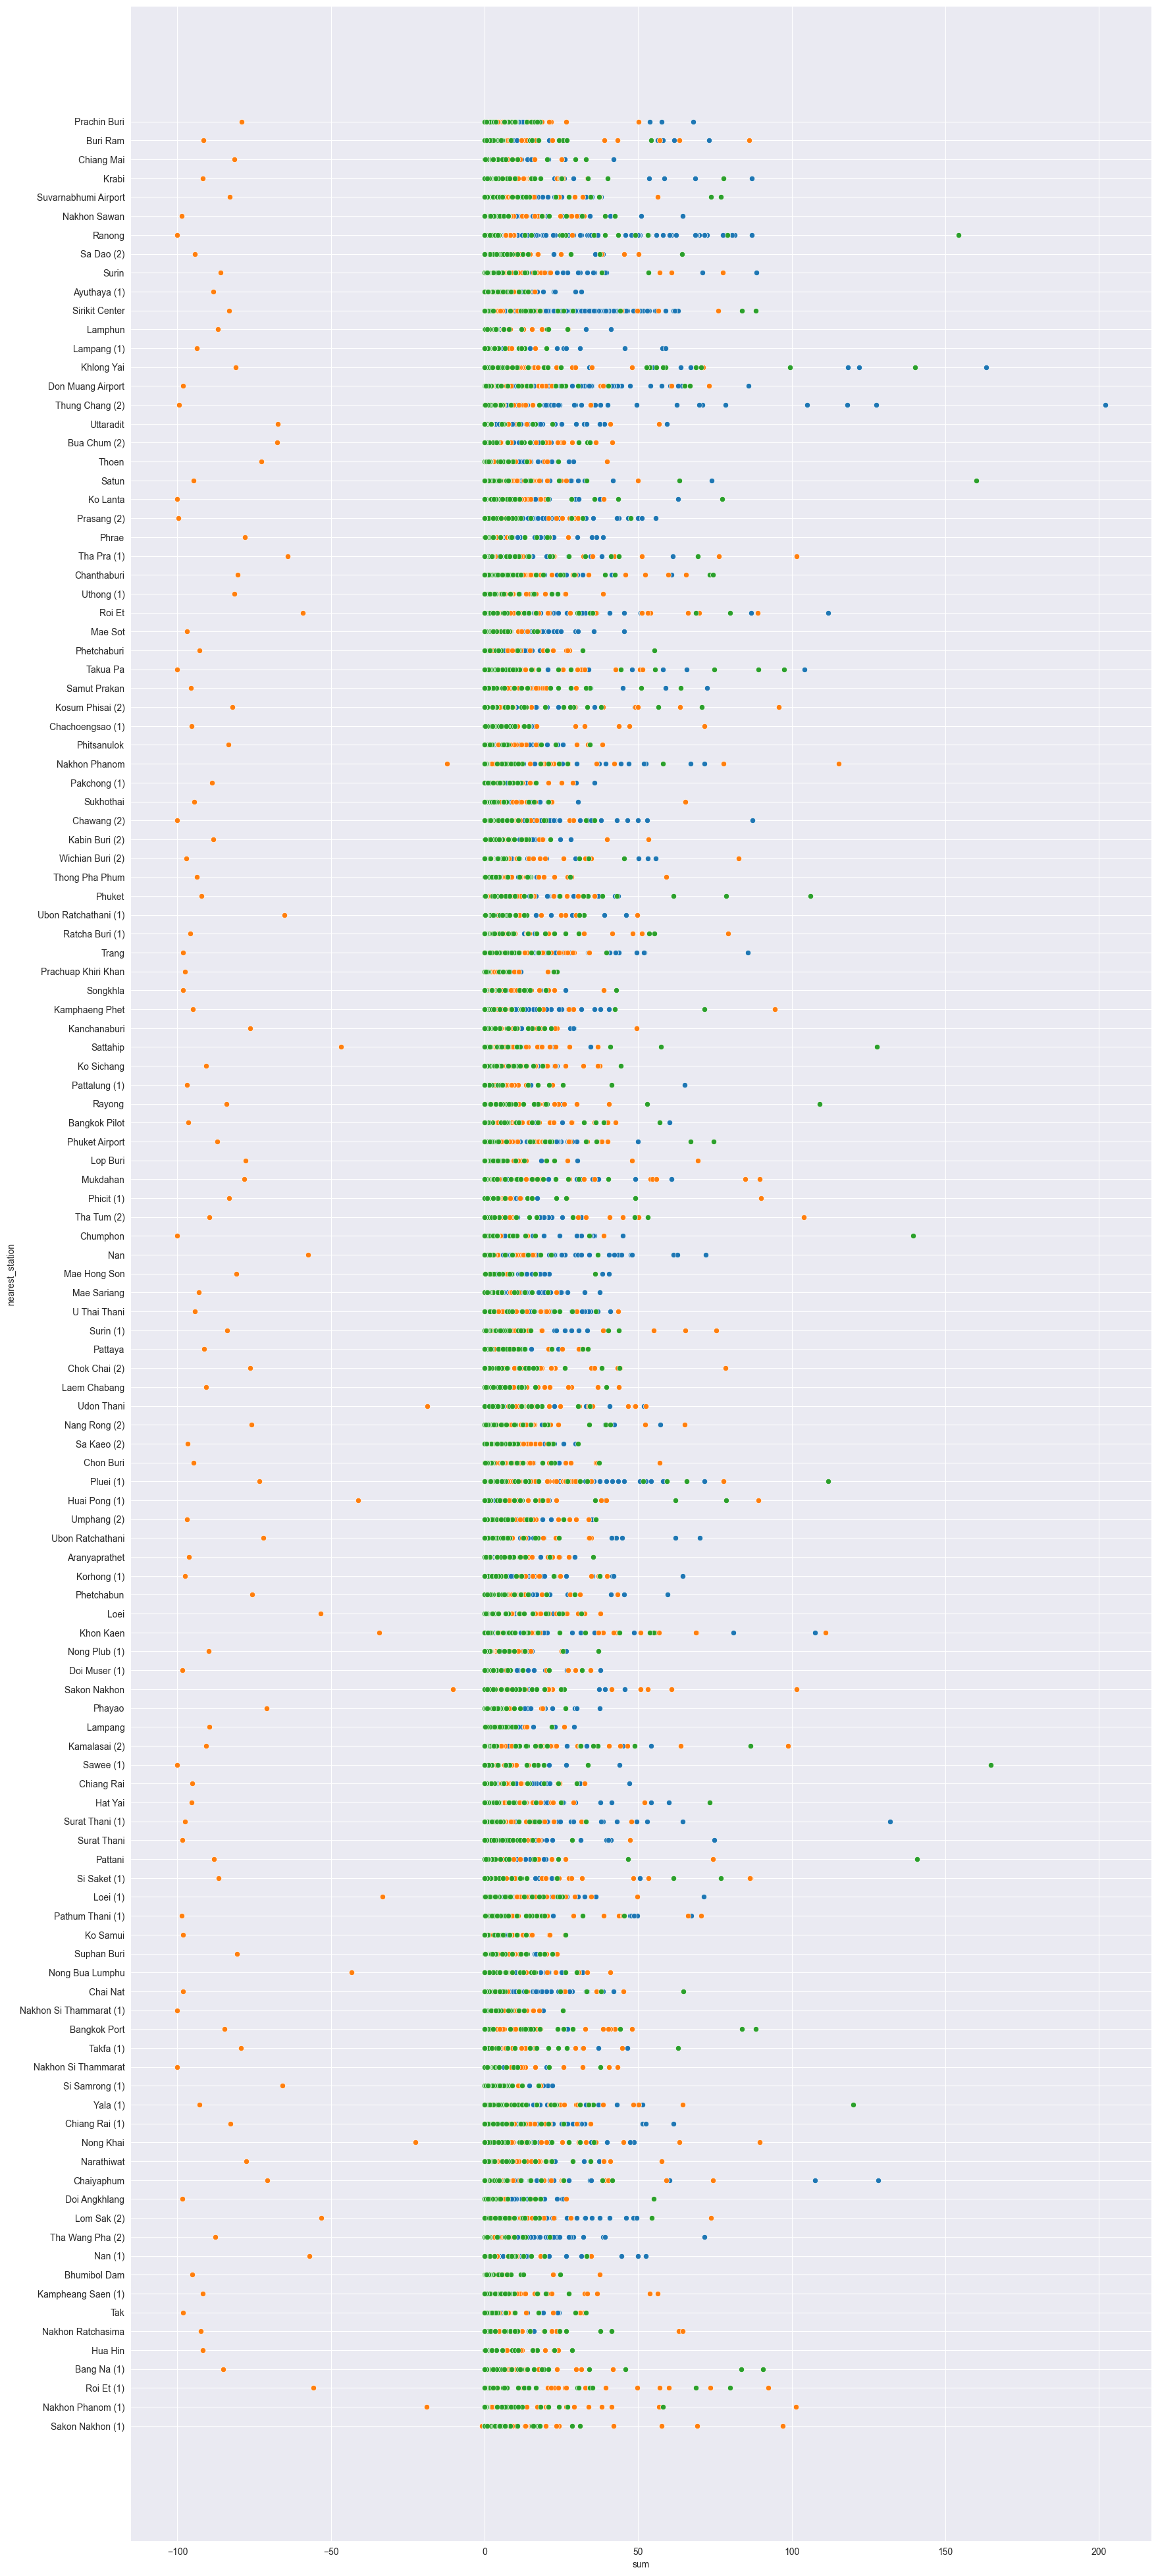

In [16]:
f, ax = plt.subplots(figsize=(20, 50))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="sum", y="nearest_station",
                palette="ch:r=-.2,d=.3_r",
                data=dft, ax=ax)
sns.scatterplot(x="sum", y="NAME_EN",
                palette="ch:r=-.2,d=.3_r",
                data=dfp_period, ax=ax)
sns.scatterplot(x="sum", y="NAME_EN",
                palette="ch:r=-.2,d=.3_r",
                data=dfg_period, ax=ax)

<AxesSubplot: xlabel='sum', ylabel='NAME_EN'>

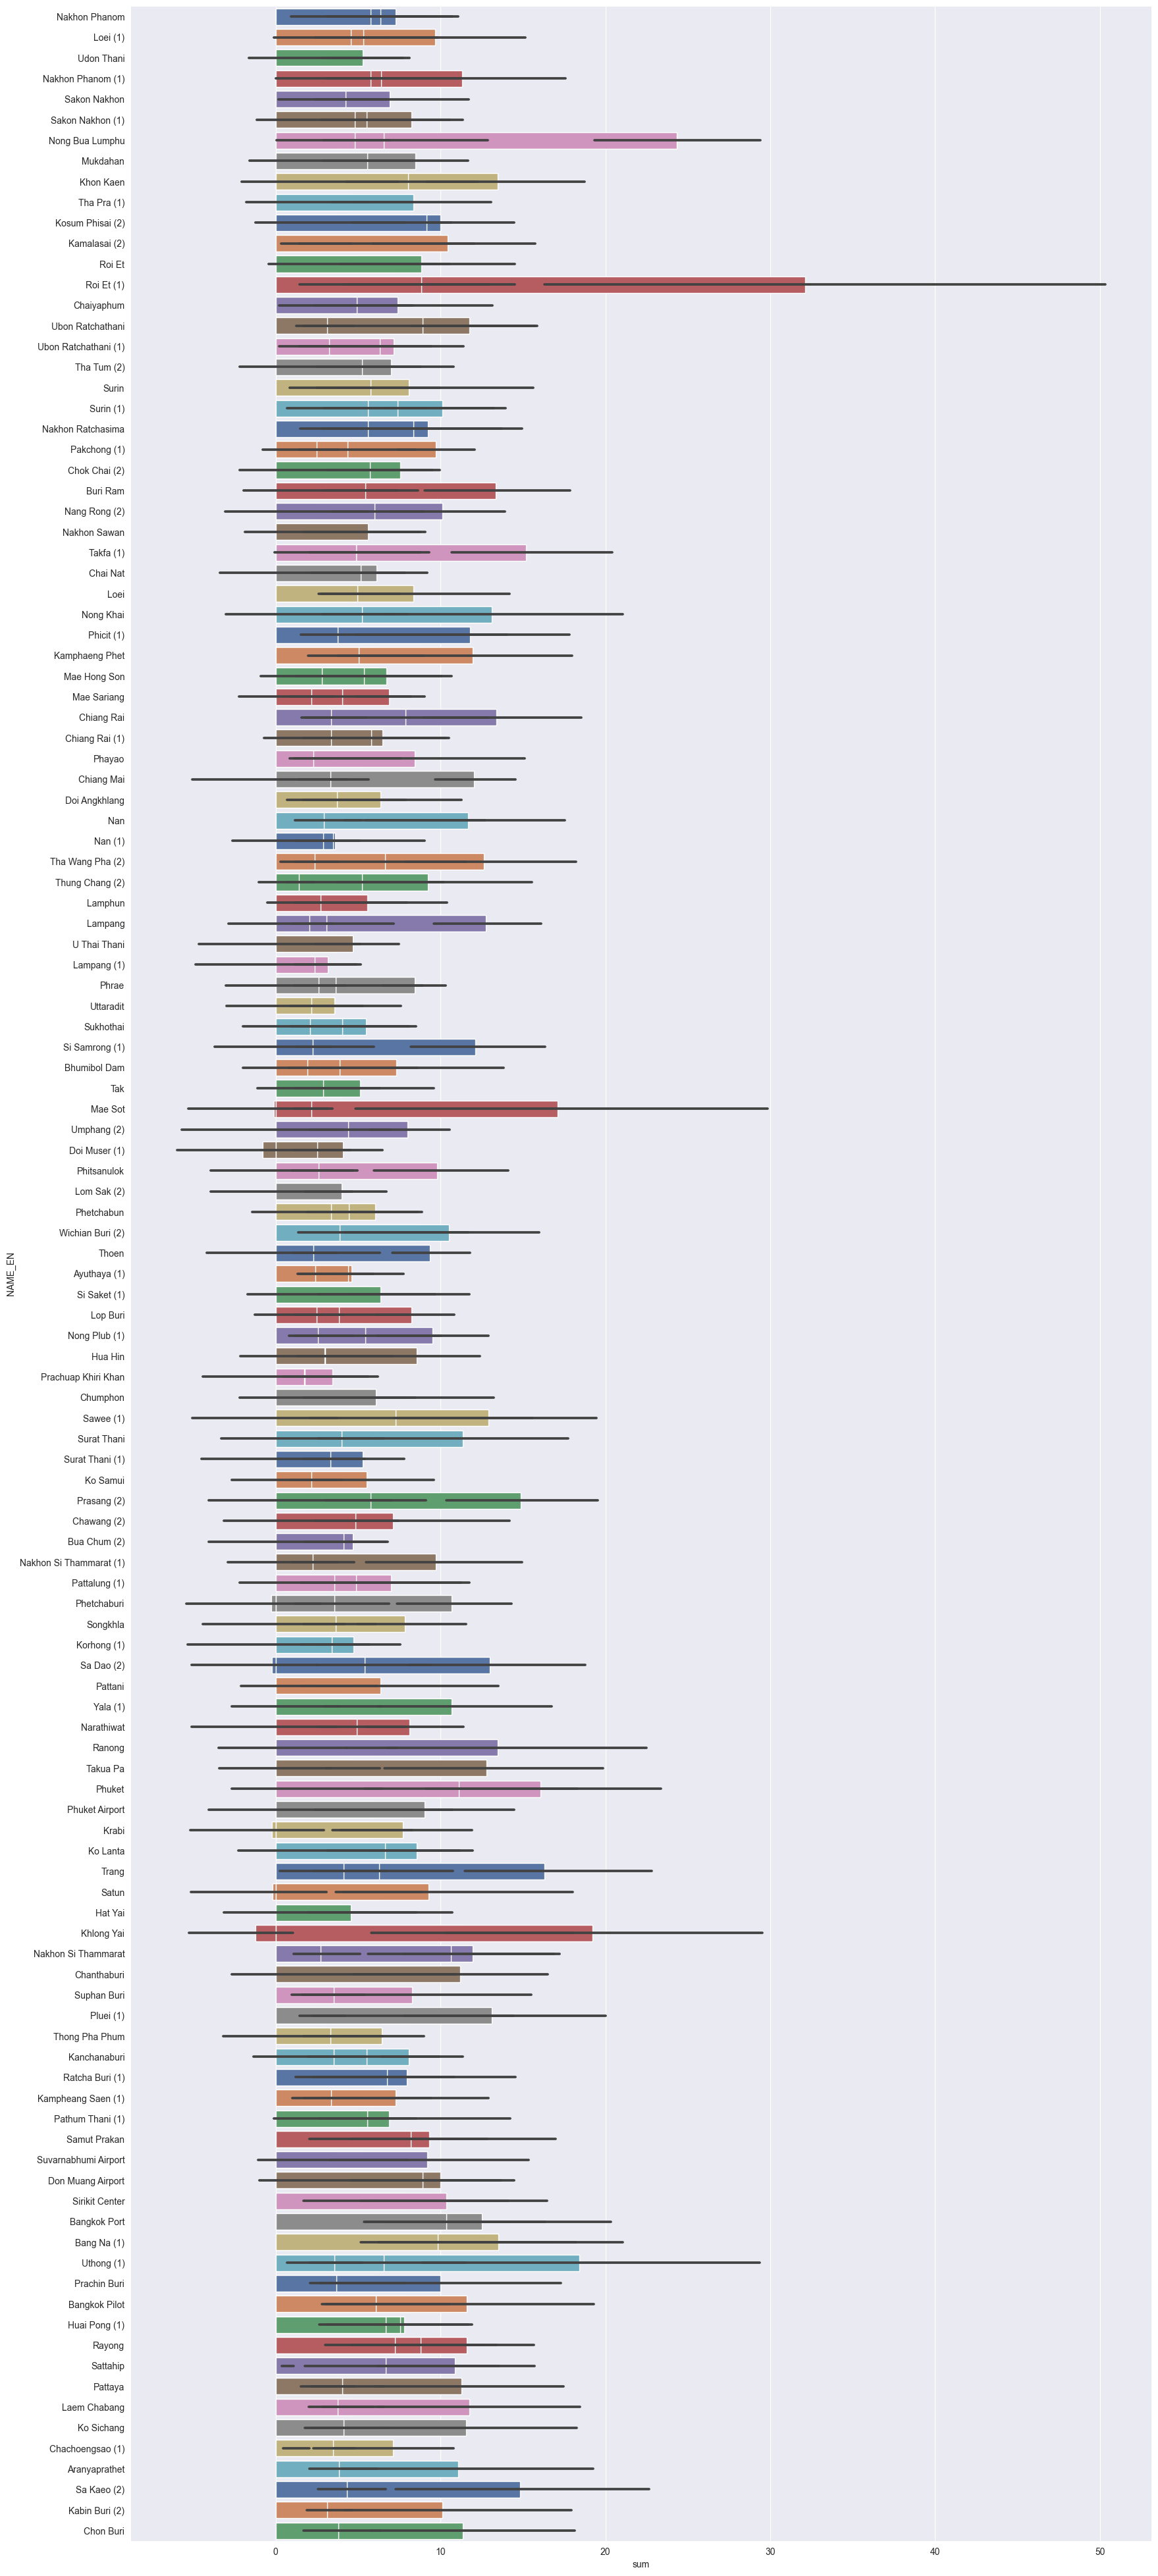

In [17]:
f, ax = plt.subplots(figsize=(20, 50))
sns.despine(f, left=True, bottom=True)
sns.barplot(x="sum", y="nearest_station",
                palette="deep",
                data=dft, ax=ax)
sns.barplot(x="sum", y="NAME_EN",
                palette="deep",
                data=dfp_period, ax=ax)
sns.barplot(x="sum", y="NAME_EN",
                palette="deep",
                data=dfg_period, ax=ax)

In [18]:
dft_mean_station = dft.groupby(dft.nearest_station)['sum'].mean()
dfg_mean_station = dfg_period.groupby(dfg_period.NAME_EN)['sum'].mean()
dfp_mean_station = dfp_period.groupby(dfg_period.NAME_EN)['sum'].mean()

df_mean_station = dft_mean_station.reset_index()
df_mean_station = df_mean_station.rename(columns={'sum': 'thaiwater_mean', 'nearest_station': 'station'})
df_mean_station = df_mean_station.set_index('station')

dfg_mean_station = dfg_mean_station.reset_index().rename(columns={'sum': 'gsmap_mean', 'NAME_EN': 'station'})
dfg_mean_station = dfg_mean_station.set_index('station')

dfp_mean_station = dfp_mean_station.reset_index().rename(columns={'sum': 'persiann_mean', 'NAME_EN': 'station'})
dfp_mean_station = dfp_mean_station.set_index('station')
display(dfg_mean_station)
display(dfp_mean_station)
display(df_mean_station)


,gsmap_mean
station,
Aranyaprathet,3.836228
Ayuthaya (1),2.424762
Bang Na (1),9.829993
Bangkok Pilot,6.095653
Bangkok Port,10.356008
...,...
Umphang (2),4.415079
Uthong (1),3.566661
Uttaradit,2.176124


,persiann_mean
station,
Aranyaprathet,6.29625
Ayuthaya (1),4.89250
Bang Na (1),5.28875
Bangkok Pilot,7.26250
Bangkok Port,7.89750
...,...
Umphang (2),2.41500
Uthong (1),5.20000
Uttaradit,7.26875


,thaiwater_mean
station,
Aranyaprathet,7.021053
Ayuthaya (1),4.535780
Bangkok Pilot,17.100000
Bangkok Port,6.026316
Bhumibol Dam,0.693333
...,...
Umphang (2),4.670833
Uthong (1),3.080000
Uttaradit,7.159592


In [19]:
all_station = list(all_station)
df_mean_station = df_mean_station.reindex(all_station, fill_value=0)

df_mean_station

,thaiwater_mean
station,
Satun,10.108163
Ubon Ratchathani (1),9.225000
Pattaya,8.558571
Pluei (1),14.861644
Nakhon Phanom (1),0.000000
...,...
Pathum Thani (1),7.626301
Mae Sot,6.138505
Pattani,4.140000


In [20]:
df_summary_station = df_mean_station.merge(dfg_mean_station['gsmap_mean'], left_index=True, right_index=True)
df_summary_station = df_summary_station.merge(dfp_mean_station['persiann_mean'], left_index=True, right_index=True)
df_summary_station

,thaiwater_mean,gsmap_mean,persiann_mean
station,,,
Satun,10.108163,9.298649,5.297500
Ubon Ratchathani (1),9.225000,3.239065,8.635000
Pattaya,8.558571,4.036120,6.521250
Pluei (1),14.861644,13.124985,21.065000
Nakhon Phanom (1),0.000000,5.774265,22.064999
...,...,...,...
Pathum Thani (1),7.626301,5.578704,11.321249
Mae Sot,6.138505,2.171240,0.951250
Pattani,4.140000,6.378371,3.653750


[]

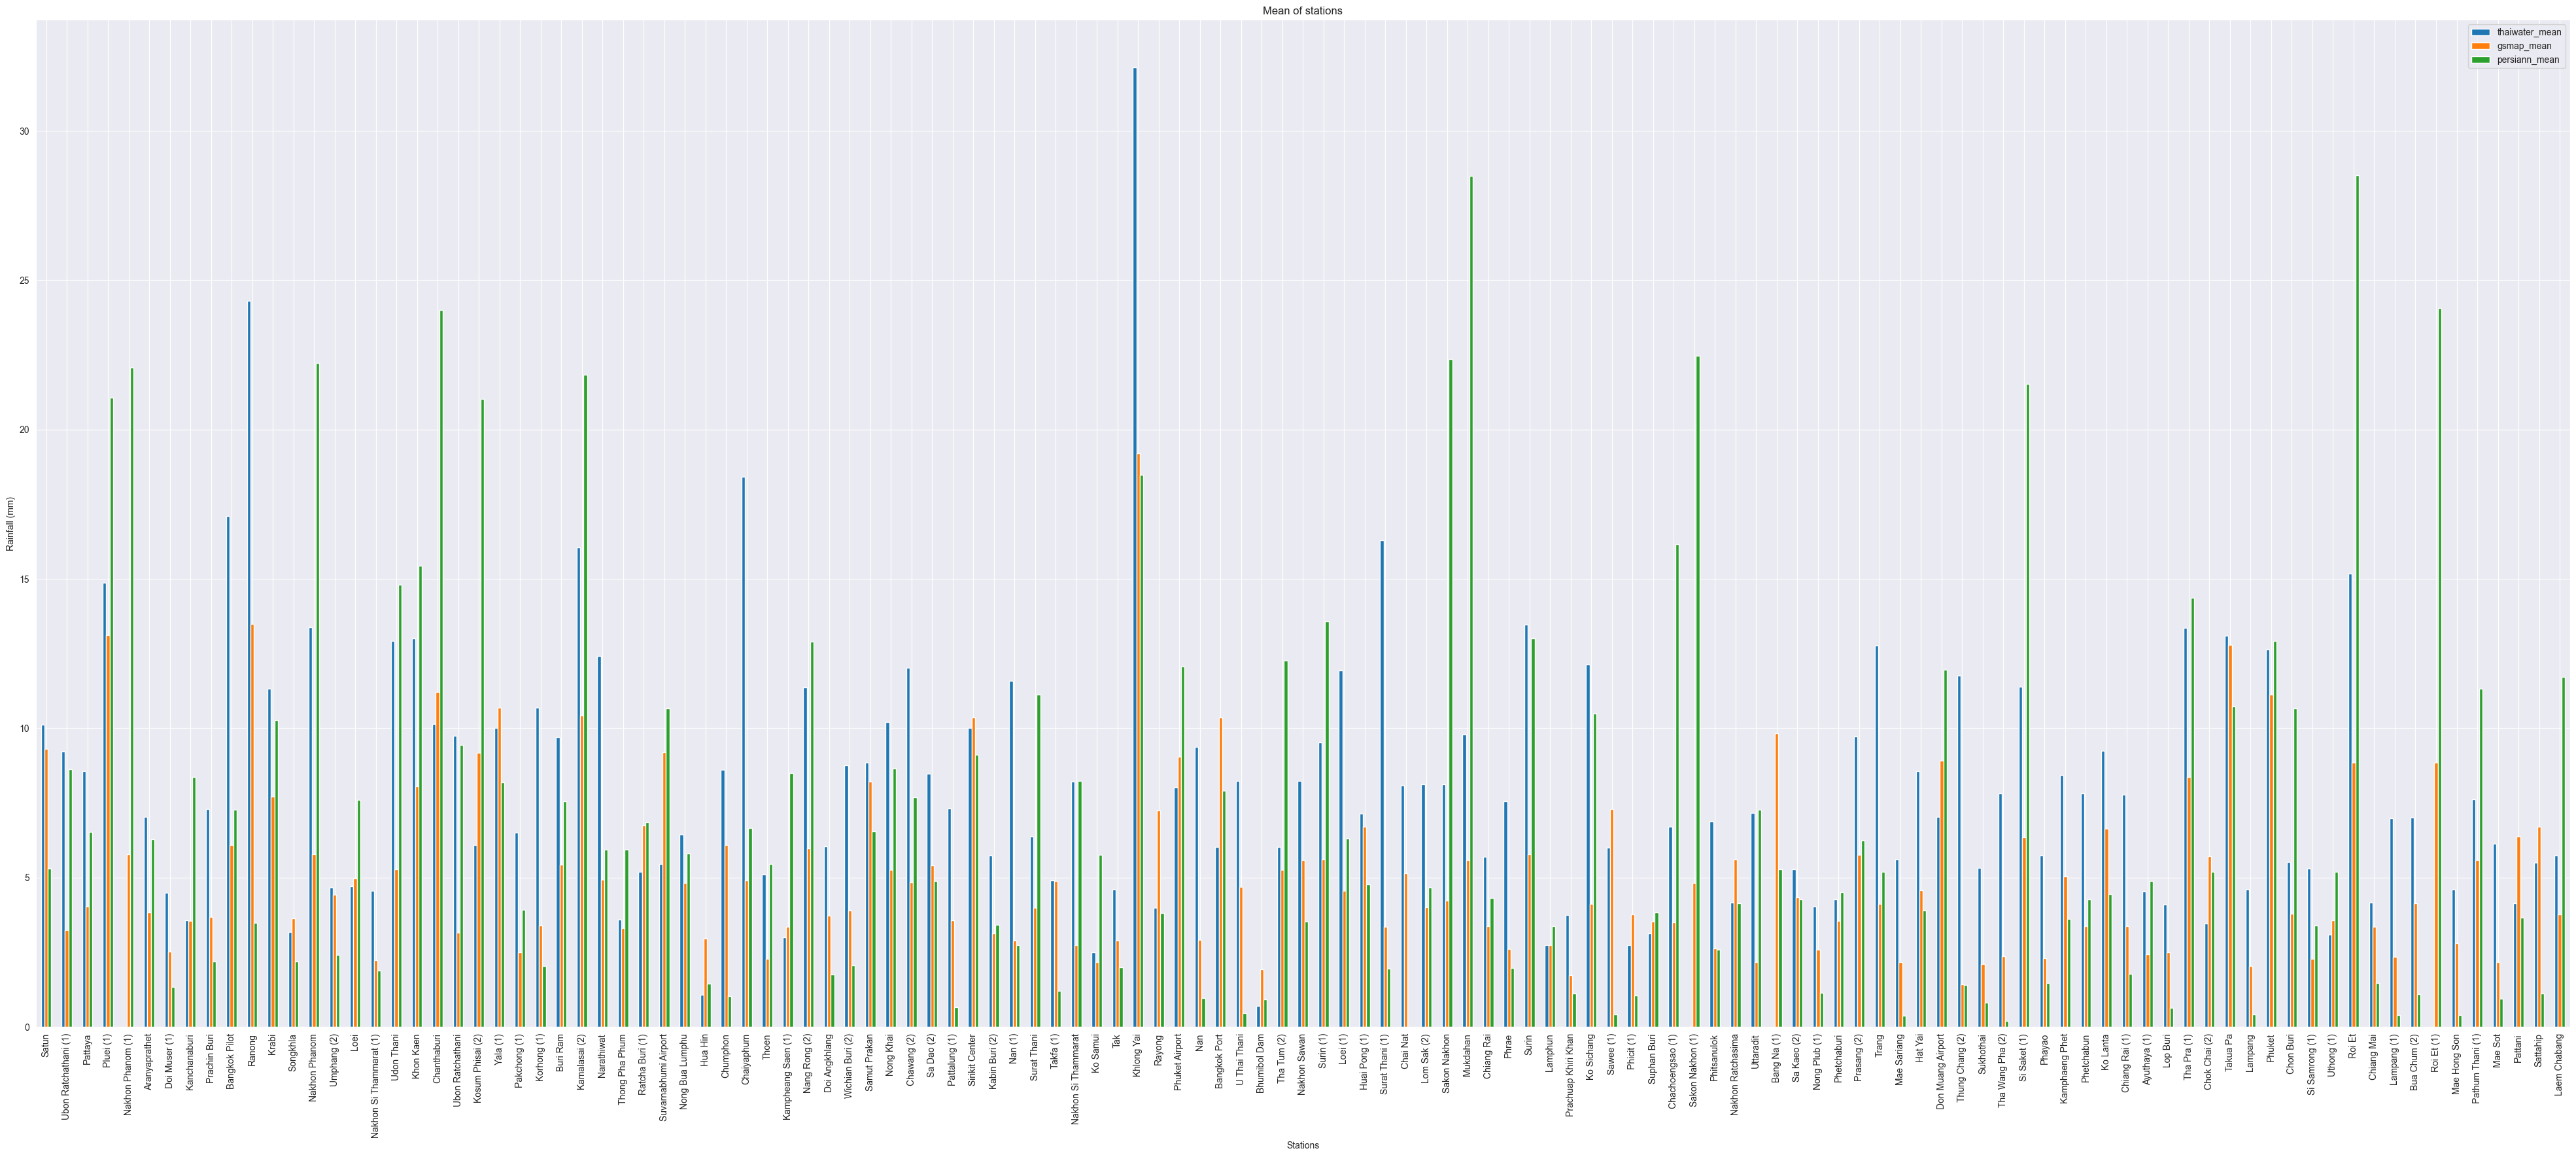

In [21]:
df_summary_station.plot.bar(figsize=(50,20))
plt.xlabel('Stations')
plt.ylabel('Rainfall (mm)')
plt.title('Mean of stations')
plt.plot()

In [22]:
dff_merge = dfp_period[['Region', 'NAME_EN', 'sum']]
dff_merge = dff_merge.rename(columns={'sum': 'persiann_mean', 'NAME_EN': 'station'})
dff_merge = dff_merge.set_index('Region')
dff_merge


,station,persiann_mean
Region,,
Southern WestCoast,Krabi,12.980000
Eastern,Rayong,9.809999
Eastern,Pattaya,5.870000
Eastern,Ko Sichang,19.029999
Eastern,Laem Chabang,11.929999
...,...,...
Northeastern,Udon Thani,15.690000
Northeastern,Loei (1),10.440001
Northeastern,Loei,11.150000


In [23]:
regions = ['Central', 'Eastern', 'Northeastern', 'Northern', 'Southern EastCoast', 'Southern WestCoast']
concat = []
for region in regions:
    station = list(set(dff_merge.loc[region]['station']))
    region = [str(region) for x in range(len(station))]
    item = pd.DataFrame({'station': station, 'region': region})
    concat.append(item)

dff_merge = pd.concat(concat)
dff_merge

,station,region
0,Nakhon Sawan,Central
1,Chai Nat,Central
2,Kampheang Saen (1),Central
3,Kanchanaburi,Central
4,Bangkok Pilot,Central
...,...,...
3,Phuket,Southern WestCoast
4,Takua Pa,Southern WestCoast
5,Phuket Airport,Southern WestCoast
6,Ko Lanta,Southern WestCoast


In [24]:
dff_merge = dff_merge.set_index('station')
df_summary_station = df_summary_station.merge(dff_merge['region'], left_index=True, right_index=True)
df_summary_station

,thaiwater_mean,gsmap_mean,persiann_mean,region
station,,,,
Satun,10.108163,9.298649,5.297500,Southern WestCoast
Ubon Ratchathani (1),9.225000,3.239065,8.635000,Northeastern
Pattaya,8.558571,4.036120,6.521250,Eastern
Pluei (1),14.861644,13.124985,21.065000,Eastern
Nakhon Phanom (1),0.000000,5.774265,22.064999,Northeastern
...,...,...,...,...
Pathum Thani (1),7.626301,5.578704,11.321249,Central
Mae Sot,6.138505,2.171240,0.951250,Northern
Pattani,4.140000,6.378371,3.653750,Southern EastCoast


In [25]:
df_summary_station.to_excel('summary_region.xlsx', engine='xlsxwriter')